<a href="https://colab.research.google.com/github/raverinpuff/arina-ML/blob/main/%D0%B2%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
with open ('/content/CAMUS, Albert - The Stranger.txt', 'r') as f:
  doc = f.read()

# открываем текст "Постороннего" Альбера Камю в переводе Стюарта Гилберта

In [ ]:
doc

'Part One\nI\nMOTHER died today. Or, maybe, yesterday; I can’t be sure. The telegram from the\nHome says: YOUR MOTHER PASSED AWAY. FUNERAL TOMORROW. DEEP\nSYMPATHY. Which leaves the matter doubtful; it could have been yesterday.\nThe Home for Aged Persons is at Marengo, some fifty miles from Algiers. With\nthe two o’clock bus I should get there well before nightfall. Then I can spend the\nnight there, keeping the usual vigil beside the body, and be back here by tomorrow\nevening. I have fixed up with my employer for two days’ leave; obviously, under the\ncircumstances, he couldn’t refuse. Still, I had an idea he looked annoyed, and I said,\nwithout thinking: “Sorry, sir, but it’s not my fault, you know.”\nAfterwards it struck me I needn’t have said that. I had no reason to excuse myself;\nit was up to him to express his sympathy and so forth. Probably he will do so the day\nafter tomorrow, when he sees me in black. For the present, it’s almost as if Mother\nweren’t really dead. The fun

In [ ]:
import re

def cleaning (text):
    text = text.lower()
    text = text.strip()
    pattern = r'[^\w\s]'
    text = re.sub(pattern, '', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\d', '', text)
    return text

doc = cleaning(doc)

# приводим к нижнему регистру, чистим от артефактов

In [ ]:
import spacy
from spacy.lang.ru.examples import sentences

In [ ]:
from spacy.cli.download import download
download(model="en_core_web_sm")

# танцуем с бубном, потому что модель со спейси по-другому не загрузить

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nlp = spacy.load('en_core_web_sm')

doc = nlp(doc)
lemmas = [token.lemma_ for token in doc] # лемматизируем текст

In [ ]:
lemmas[:10]

['part', 'one', 'I', 'mother', 'die', 'today', 'or', 'maybe', 'yesterday', 'I']

In [ ]:
!pip install numpy==1.23.5 gensim

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=[lemmas], vector_size=100, window=5, min_count=1, workers=4)

In [ ]:
model.wv

In [ ]:
model.wv.index_to_key # смотрим, что за ключи сохранились

['the',
 'I',
 'be',
 'and',
 'to',
 'a',
 'he',
 'of',
 'that',
 'have',
 'in',
 'my',
 'it',
 'not',
 'his',
 'on',
 'she',
 'at',
 'for',
 'as',
 'say',
 'but',
 'with',
 'do',
 'd',
 'you',
 'then',
 'they',
 'one',
 'we',
 'go',
 'up',
 'all',
 'when',
 'this',
 'so',
 'come',
 'what',
 'could',
 'ask',
 'after',
 'there',
 'if',
 'see',
 'by',
 'man',
 'out',
 'no',
 'make',
 'get',
 'tell',
 'some',
 'look',
 'from',
 'like',
 'time',
 'take',
 'her',
 'or',
 'raymond',
 'feel',
 'mother',
 'back',
 'about',
 'down',
 'quite',
 'know',
 'an',
 'which',
 'only',
 'would',
 'day',
 'well',
 'little',
 'think',
 'very',
 'i',
 'eye',
 'thing',
 'first',
 'seem',
 'again',
 's',
 'marie',
 'just',
 'moment',
 'give',
 'off',
 'much',
 'face',
 'their',
 'more',
 'old',
 'other',
 'into',
 'way',
 'hand',
 'same',
 'now',
 'start',
 'too',
 'never',
 'still',
 'who',
 'while',
 'its',
 'any',
 'really',
 'turn',
 'keep',
 'rather',
 'want',
 'before',
 'hear',
 'two',
 'our',
 'begin

In [ ]:
model.vector_size # смотрим размер

100

In [ ]:
for index, word in enumerate(model.wv.index_to_key):
    if index == 10:
        break
    print(f"word #{index}/{len(model.wv.index_to_key)} is {word}")

word #0/3343 is the
word #1/3343 is I
word #2/3343 is be
word #3/3343 is and
word #4/3343 is to
word #5/3343 is a
word #6/3343 is he
word #7/3343 is of
word #8/3343 is that
word #9/3343 is have


In [ ]:
model.wv['walk']

array([-0.05344869,  0.10898048, -0.0048076 , -0.04147146, -0.04033746,
       -0.1768632 ,  0.1016962 ,  0.25139424, -0.09208878, -0.10256815,
       -0.0328667 , -0.15946753, -0.07363719,  0.06747892, -0.0103461 ,
       -0.04123981,  0.07659519, -0.09772736, -0.09558883, -0.29484645,
        0.08901282,  0.03879405,  0.19507436, -0.03622933,  0.02154244,
        0.01731229, -0.09819485, -0.09510391, -0.04901609,  0.02958338,
        0.11500356,  0.02218253,  0.09964282, -0.16339594, -0.01979657,
        0.13824177,  0.06233456, -0.10490842, -0.01920819, -0.2393584 ,
        0.03510202, -0.14375852, -0.07072874,  0.01278336,  0.11127162,
       -0.04086743, -0.08931083,  0.00683507,  0.08801285,  0.0410867 ,
        0.09108706, -0.11516961, -0.01119494,  0.03410619, -0.04896128,
        0.08928117,  0.05179914, -0.02896008, -0.13062173,  0.06425017,
        0.0707588 , -0.0390347 ,  0.04687737, -0.06227874, -0.08516353,
        0.16341113,  0.05213751,  0.15025112, -0.11969595,  0.18

In [ ]:
model.wv.most_similar(['arab'])

[('up', 0.9930157661437988),
 ('call', 0.9929487705230713),
 ('it', 0.9928961992263794),
 ('room', 0.9928908944129944),
 ('while', 0.9928888082504272),
 ('but', 0.992885410785675),
 ('keep', 0.9928800463676453),
 ('to', 0.992851972579956),
 ('so', 0.9928323030471802),
 ('on', 0.9928127527236938)]

In [ ]:
model.wv.similarity('lawyer', 'magistrate')

-0.041850496

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

from sklearn.decomposition import PCA

In [ ]:
def pca_scatterplot(model, words=None, sample=0):
  word_vectors = [model.wv[w] for w in words]
  # сократить размерность векторов до 2D
  vectors_2d = PCA().fit_transform(word_vectors)
  # отрисовка изображения, задаем размер 12 на 10
  plt.figure(figsize=(12,10))
  # задаем цвет точек и ссылаемся на данные по осям x (0) и y (1)
  plt.scatter(vectors_2d[:,0], vectors_2d[:,1], c='r')
  # добавляем подписи к данным, проходимся по списку слов
  for i, word in enumerate(words):
    # соотносим слово с его двухмерным вектором
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]))

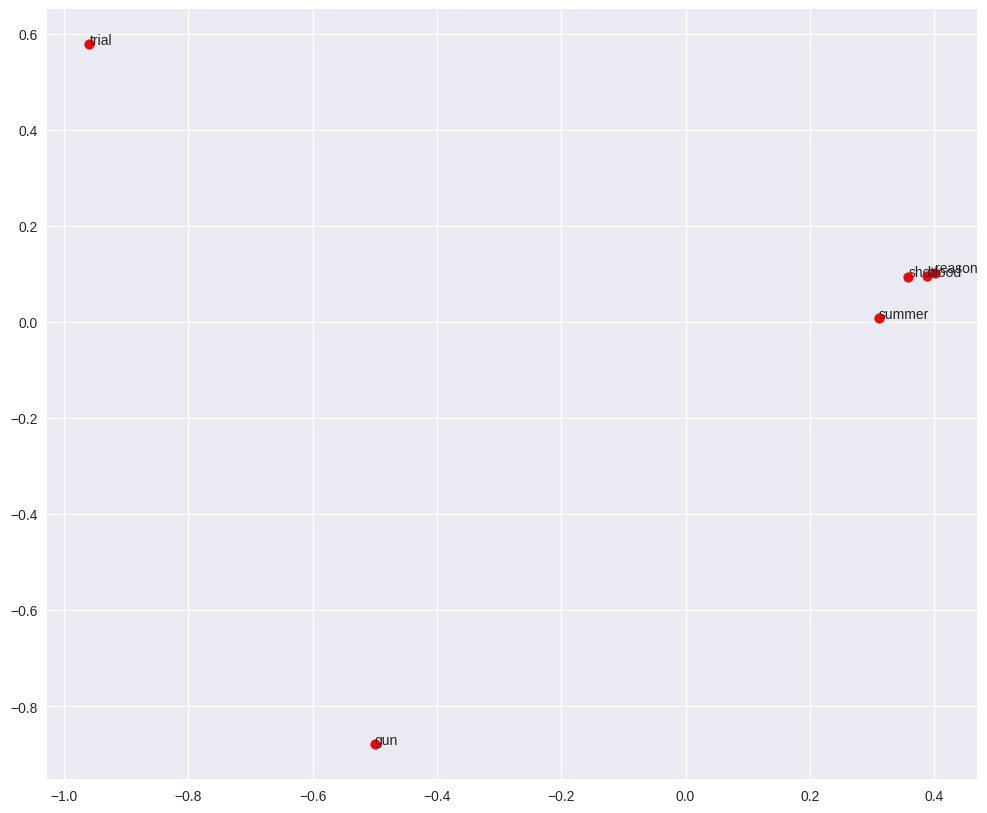

In [ ]:
pca_scatterplot(model, ['reason', 'trial', 'shot', 'gun', 'summer', 'blood'])

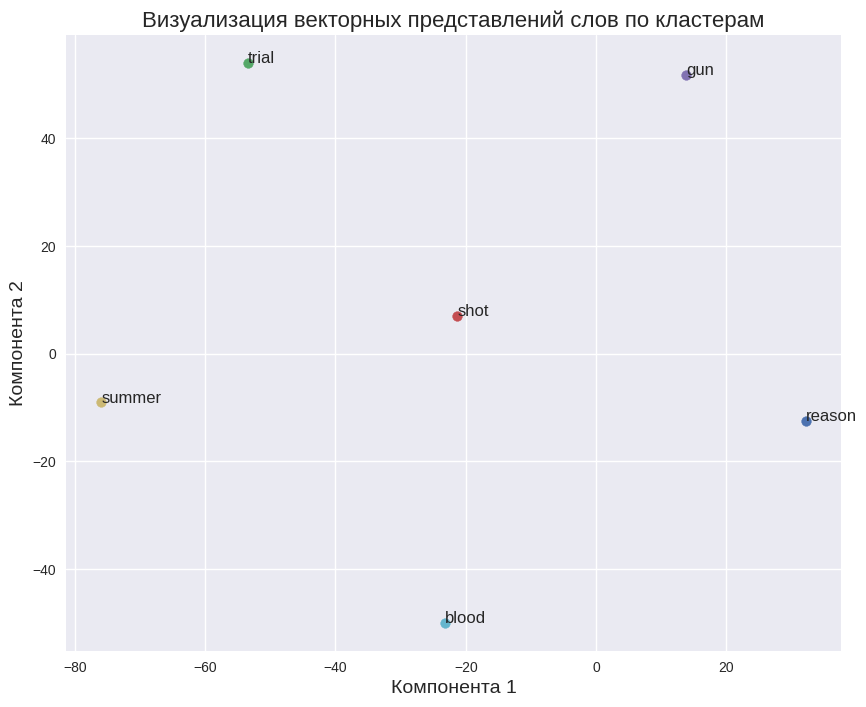

In [ ]:
import numpy as np
from sklearn.manifold import TSNE

words = ['reason', 'trial', 'shot', 'gun', 'summer', 'blood']

word_vectors = [model.wv[word] for word in words]

word_vectors = np.array(word_vectors)

tsne = TSNE(n_components=2, perplexity=5, random_state=42)
word_vectors_2d = tsne.fit_transform(word_vectors)

plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
    plt.text(word_vectors_2d[i, 0], word_vectors_2d[i, 1], word, fontsize=12)

plt.title("Визуализация векторных представлений слов по кластерам", fontsize=16)
plt.xlabel("Компонента 1", fontsize=14)
plt.ylabel("Компонента 2", fontsize=14)
plt.show()